In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['font.size'] = 12

In [2]:
f0 = 10e6
fLO = 10e6-10e3
nco_width = 32
fsamp = 76.8e6
T = 0.1
phase = np.fromfile('phase_2021-11-27T22:20:46.613919.f32', 'float32')
phase_unwrap = np.unwrap(phase)
t = np.arange(phase.size)*T

In [3]:
nco_value = fLO/fsamp*2**nco_width
nco_value_error = round(nco_value) - nco_value
nco_value_error

0.20000004768371582

In [4]:
nco_value_error = 0.2

In [5]:
freq_error = nco_value_error/2**nco_width*fsamp
freq_error

0.0035762786865234375

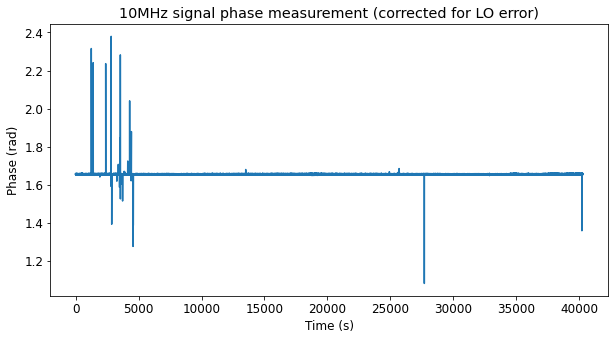

In [6]:
phase_corrected = phase_unwrap + 2*np.pi*freq_error*t
plt.plot(t, phase_corrected)
plt.title('10MHz signal phase measurement (corrected for LO error)')
plt.xlabel('Time (s)')
plt.ylabel('Phase (rad)');

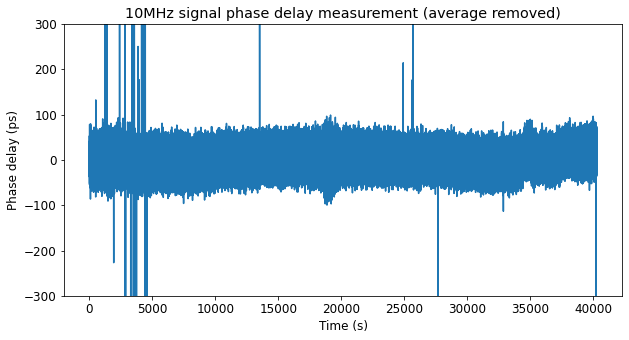

In [7]:
relative_delay = (phase_corrected - np.average(phase_corrected))/(2*np.pi*f0)
plt.plot(t, relative_delay * 1e12)
plt.ylim((-300, 300))
plt.title('10MHz signal phase delay measurement (average removed)')
plt.xlabel('Time (s)')
plt.ylabel('Phase delay (ps)');

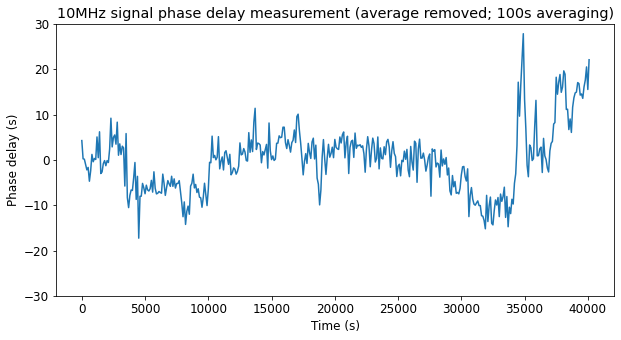

In [8]:
avg = 1000
plt.plot(t[:t.size//avg*avg][::avg],
         1e12*np.average(relative_delay[:relative_delay.size//avg*avg].reshape((-1, avg)), axis=1))
plt.ylim((-30, 30))
plt.title(f'10MHz signal phase delay measurement (average removed; {avg*T:.0f}s averaging)')
plt.xlabel('Time (s)')
plt.ylabel('Phase delay (s)');

In [9]:
def avar(x, n):
    return np.average((x[2*n:] - 2*x[n:-n] + x[:-2*n])**2)/(2*n**2*T**2)

In [10]:
n = np.int32(np.round(np.logspace(0, np.log10(relative_delay.size//3), 10000)))
adevs = np.sqrt(np.array([avar(relative_delay, m) for m in n]))

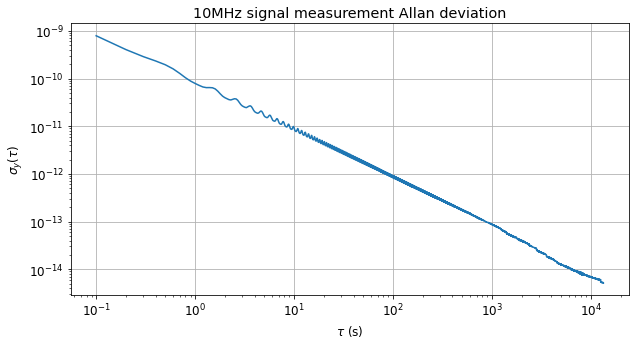

In [11]:
plt.loglog(n*T, adevs)
plt.title('10MHz signal measurement Allan deviation')
plt.xlabel('$\\tau$ (s)')
plt.ylabel('$\sigma_y(\\tau)$')
plt.grid();